In [ ]:

import pandas as pd
import numpy as np
from time import time
import logging
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [ ]:
# faces = fetch_lfw_people('data', min_faces_per_person=70, resize=0.4)
from sklearn.datasets import fetch_lfw_people

# Specify keyword arguments using their names
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


In [ ]:
n_samples, h, w = faces.images.shape
np.random.seed(42)

x = faces.data
n_features = x.shape[1]

y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print( "n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=42)

In [ ]:
n_components = 200
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
t0 = time()

#Creating instances of PCA, initializing with n_components and whiten=True
pca = PCA(n_components=n_components, whiten=True, svd_solver="randomized")
pca = pca.fit(X_train)
print("Done in %0.3fs" %(time()- t0))

Extracting the top 200 eigenfaces from 966 faces
Done in 0.667s


In [ ]:
eigenfaces = pca.components_.reshape((n_components, h, w))

t0=time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Done in %0.3fs" %(time()- t0))

Done in 0.030s


In [ ]:
param_grid = { 'C': [1e3, 5e3, 1e4, 5e4, 1e5],
               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, Y_train)

print("Best Estimator found by Grid Search:")
print(clf.best_estimator_)


Best Estimator found by Grid Search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [ ]:
y_pred = clf.predict(X_test_pca)
print(confusion_matrix(Y_test, y_pred, labels=range(n_classes)))
print(classification_report(Y_test, y_pred, target_names=target_names))

[[  8   1   1   3   0   0   0]
 [  2  53   1   2   1   1   0]
 [  3   2  20   1   0   1   0]
 [  1   8   2 131   2   1   1]
 [  0   2   0   1  20   0   2]
 [  0   3   0   1   1   9   1]
 [  0   2   2   2   0   0  30]]
                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.62      0.59        13
     Colin Powell       0.75      0.88      0.81        60
  Donald Rumsfeld       0.77      0.74      0.75        27
    George W Bush       0.93      0.90      0.91       146
Gerhard Schroeder       0.83      0.80      0.82        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.88      0.83      0.86        36

         accuracy                           0.84       322
        macro avg       0.78      0.77      0.77       322
     weighted avg       0.85      0.84      0.84       322



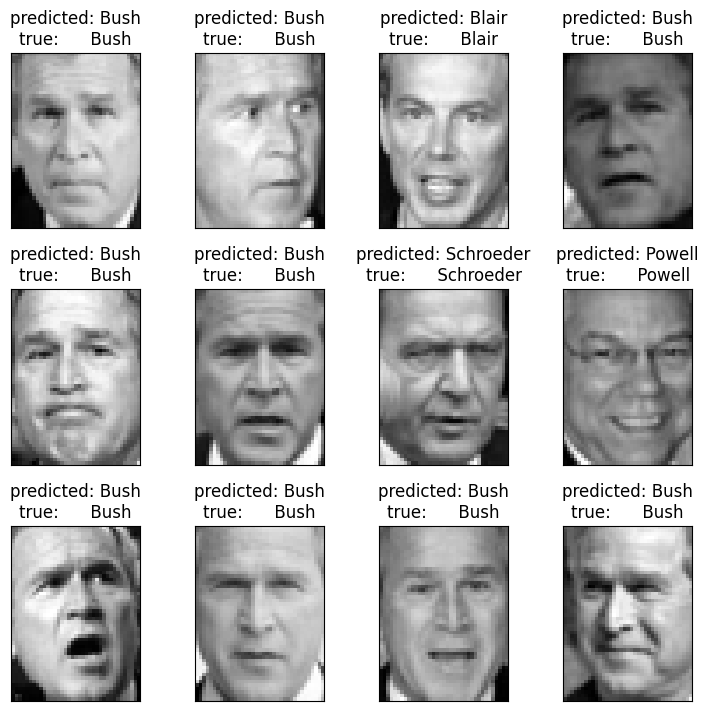

In [ ]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

    plt.show()



def plot(images, titles, h, w, n_row=4, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())



#Plotting the result of the predictions on a portion of the test set

def title(y_pred, Y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[Y_test[i]].rsplit(' ', 1)[-1]
    return ('predicted: %s\ntrue:      %s' % (pred_name, true_name))

prediction_titles = [title(y_pred, Y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

pl.show()

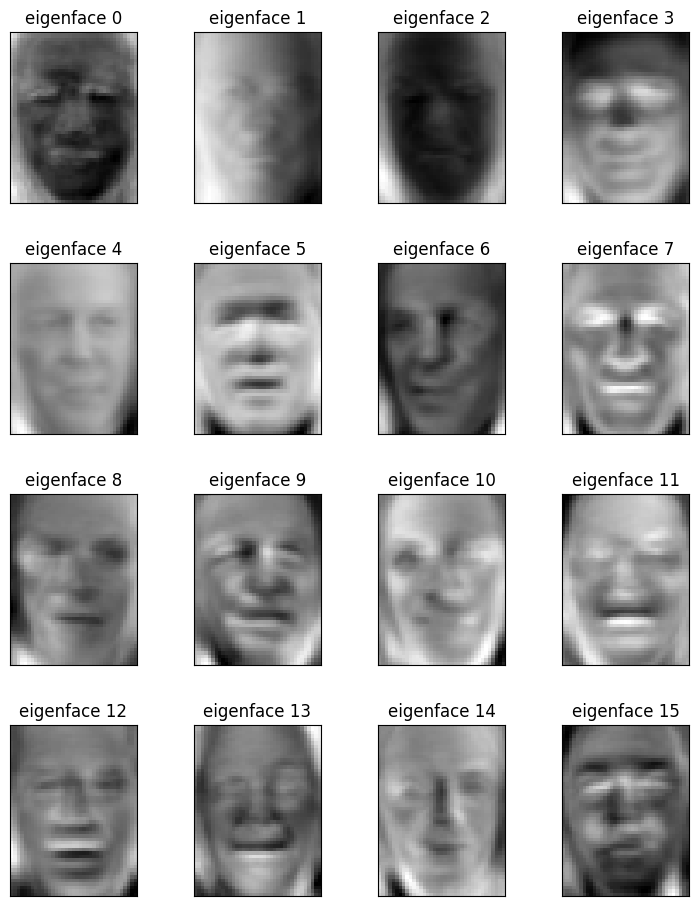

In [ ]:
eigenface_titles = ["eigenface %d" %i for i in range(eigenfaces.shape[0])]
plot(eigenfaces, eigenface_titles, h, w)
pl.show()

Epoch 1/50
25/25 [==============================] - 2s 12ms/step - loss: 2.0969 - accuracy: 0.2306 - val_loss: 1.7545 - val_accuracy: 0.3557
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 1.3982 - accuracy: 0.4974 - val_loss: 1.5280 - val_accuracy: 0.4639
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0127 - accuracy: 0.7060 - val_loss: 1.3585 - val_accuracy: 0.5515
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.7399 - accuracy: 0.8510 - val_loss: 1.2351 - val_accuracy: 0.5928
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.9404 - val_loss: 1.1228 - val_accuracy: 0.6443
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3978 - accuracy: 0.9741 - val_loss: 1.0514 - val_accuracy: 0.6649
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2978 - accuracy: 0.9819 - val_loss: 0.9880 - val_accuracy: 0.6753
Epoch 8/50
25/25 [=

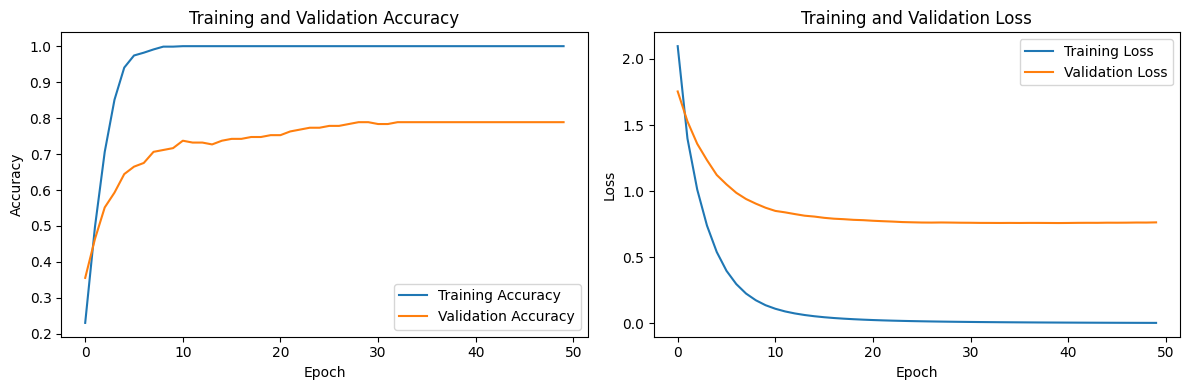

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a Sequential model
model = Sequential([
    Dense(128, input_shape=(X_train_pca.shape[1],), activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model and record accuracy and loss history
history = model.fit(X_train_pca, Y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
from skimage import io, color
import numpy as np

# Load the new image (assuming 'new_image_path' is the file path to the image)
new_image_path = "morgan.jpg"
new_image = io.imread(new_image_path)

# Convert the image to grayscale
grayscale_image = color.rgb2gray(new_image)

# Resize the image to the same dimensions as your training data
resized_image = cv2.resize(grayscale_image, (w, h))

# Normalize pixel values to be in the range [0, 1]
normalized_image = resized_image / 255.0

# Flatten the image into a 1D array
flattened_image = normalized_image.reshape(1, -1)

# Perform PCA transformation (assuming 'pca' is your trained PCA model)
new_image_pca = pca.transform(flattened_image)

# Use the trained SVM classifier to predict the label for the new image
predicted_label = clf.predict(new_image_pca)

# Map the predicted label to the person's name using target_names
predicted_person = target_names[predicted_label[0]]

print("Predicted Person: ", predicted_person)


Predicted Person:  Colin Powell
